<h1><b><u><center>Our Customer</center></u></b></h1>

### <center>Introduction</center>
- This is a Machine Learning Model created to predict whether the customers of the online food platform re-order or not
- The data shows variety of features such as Age, Family-size,monthly income.. etc
- By analysing the data to find the relation within the features and creates two model and compare both of them to check which one perform better by valuating their accuracy and prediction is made using that model
- Decition Tree and Support Vector Machine model are used as models
- Exploratory Data Analysis is done to analyze the data and have shared the relation and trends between the feature, also removed unwanted Features from the data so that only selected features will be taken to the model.
- Models predict using the algorithm in which every Machine learning models have different way of finding the solution 

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [298]:
# df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv')

In [299]:
# df.to_csv('C:/Users/User/Desktop/DATA/ML_Projects/datasets/onlinefood.csv',index=False)

In [300]:
df=pd.read_csv('C:/Users/User/Desktop/DATA/ML_Projects/datasets/onlinefood.csv')

In [301]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


- Age: the age of the customer
- Marital_status: marital status of the customer
- Occupation: occupation of the customer
- Monthly_Income: monthly income of the customer
- Educational Qualifications:educational qualification of the customer
- Family size: number of family members of the customer
- latitude and longitude of the location of the customer
- Pin Code: pin code of the residence of the customer
- Output: did the customer order again
- Feedback: Feedback of the last order

In [302]:
df.shape

(388, 13)

In [303]:
df.size

5044

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


- data is cleaned and Ready to process

## EDA

In [305]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


<Axes: xlabel='Age', ylabel='Density'>

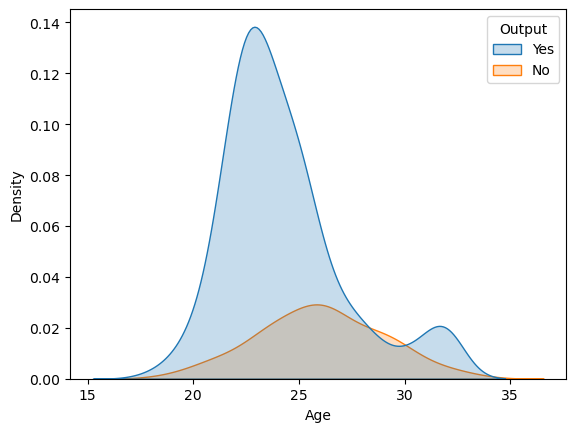

In [306]:
sns.kdeplot(x='Age',data=df,hue='Output',fill=True)

<Axes: xlabel='Feedback', ylabel='count'>

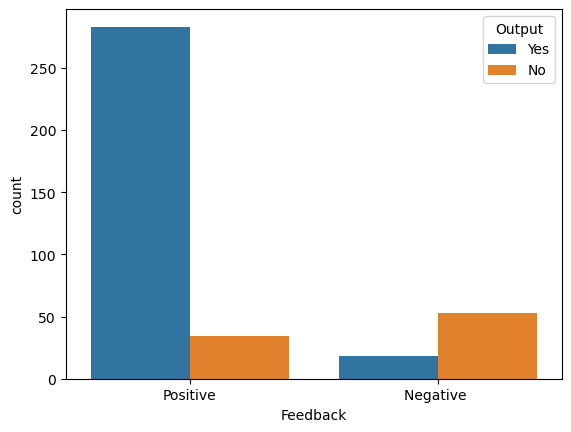

In [307]:
sns.countplot(x='Feedback',data=df,hue='Output')

- it is found that feedback from the customers are positive and have ordered again
- But still there are Customers who given negative feedback which results in stopping them from ordering.

In [308]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [309]:
fam=df.groupby('Output')['Family size'].get_group('Yes').value_counts()

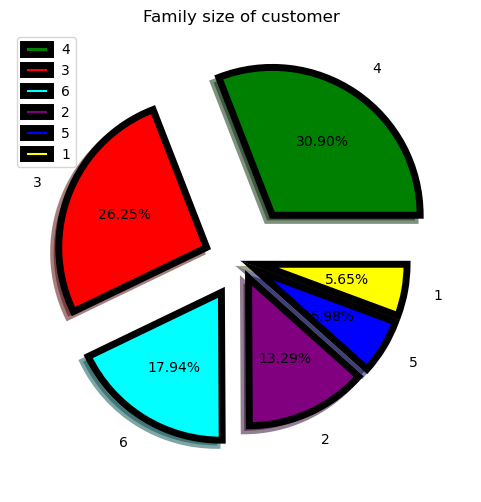

In [310]:
wedgeprops={'edgecolor':'black','linewidth':5}
explode=(0.3,0.2,0.2,0.1,0.1,0.1)
cat=df['Family size'].unique()
color=['Green','Red','aqua','purple','blue','yellow']
plt.figure(figsize=(6,6))
plt.pie(fam,autopct='%1.2f%%',wedgeprops=wedgeprops,explode=explode,shadow=True,radius=.8,labels=cat,colors=color,labeldistance=1.2)
plt.legend()
plt.title('Family size of customer')
plt.show()

- The above pie chart is about the Family size of the customer who ordered again
- A family of 4 member have a big chance of otrdering again showing that 30% of the customers are with a family-Size of 4
- Whereas a family-size of 1 or a cutomer who is living alone is with 5.65% of chance of ordering again 

In [311]:
mou=df.groupby('Output')['Marital Status'].get_group('Yes').value_counts()

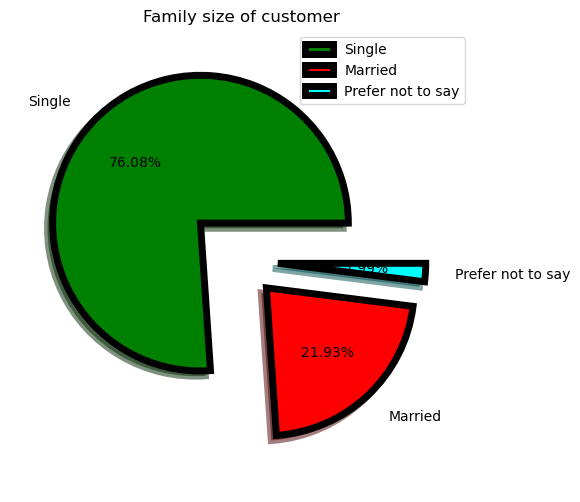

In [312]:
wedgeprops={'edgecolor':'black','linewidth':5}
explode=(0.3,0.2,.2)
cat=df['Marital Status'].unique()
color=['Green','Red','aqua','purple','blue','yellow']
plt.figure(figsize=(6,6))
plt.pie(mou,autopct='%1.2f%%',wedgeprops=wedgeprops,explode=explode,shadow=True,radius=.8,labels=cat,colors=color,labeldistance=1.2)
plt.legend()
plt.title('Family size of customer')
plt.show()

- It is clear that we have a big number of customer who are unmarried (single) with a percentage of 76.08 
- A few of them prefer not to say 

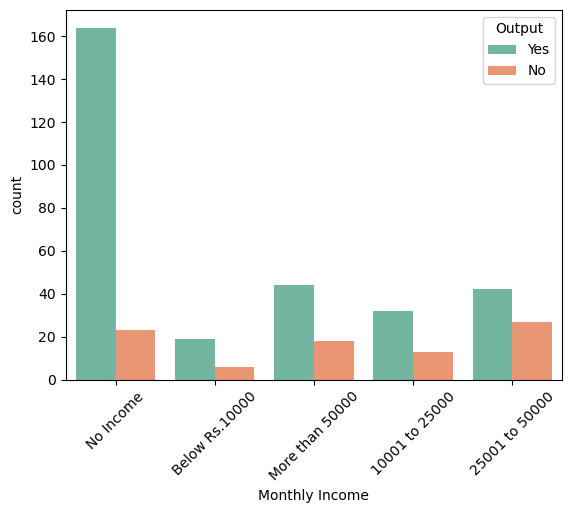

In [313]:
sns.countplot(x='Monthly Income',data=df,hue='Output',palette='Set2')
plt.xticks(rotation=45)
plt.show()

- Customers with no income ordering more than that of with income
- it may be because most of our customers will be students or unemployed

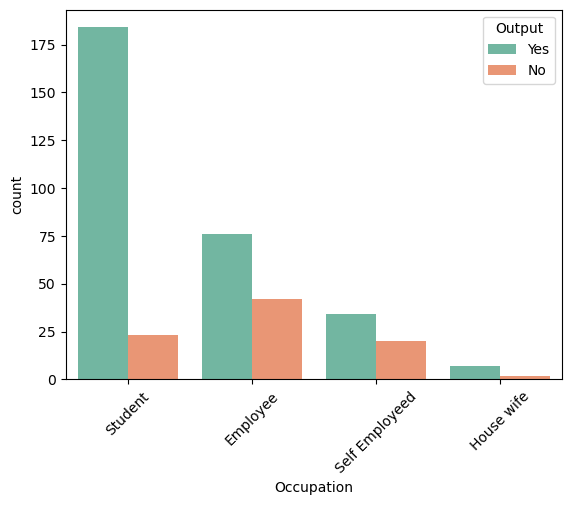

In [314]:
sns.countplot(x='Occupation',data=df,hue='Output',palette='Set2')
plt.xticks(rotation=45)
plt.show()

- Yes, as we predicted most of our Customers are students

### Converting Target value to binary

In [315]:
df['Output']=df['Output'].apply(lambda x: 0 if x == 'No' else 1)

#### Correlation among features

<Axes: >

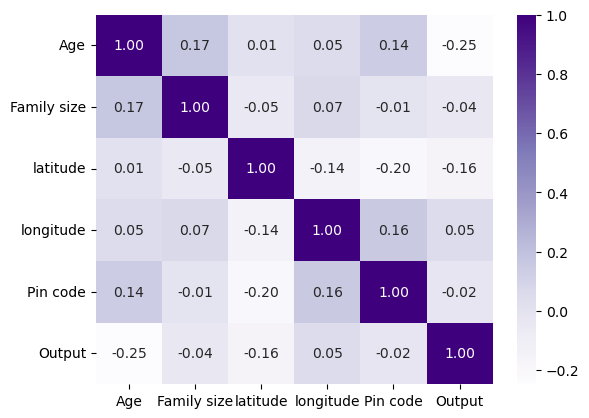

In [316]:
sns.heatmap(df.corr(),cmap='Purples',fmt='.2f',annot=True)

- Correlation after converting target variable 
- Age shows a negative correlation with the Target Feature with -.25%
- Picode doesnt show any relation 

In [317]:
df.drop('Pin code',axis=1,inplace=True)
df.drop(['Unnamed: 12','latitude','longitude'],axis=1,inplace=True)
# dropping or Removing Unwanted Features

## Independent and Target Features

In [318]:
X=df.drop('Output',axis=1)

y=df['Output']

In [319]:
X

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Negative
3,22,Female,Single,Student,No Income,Graduate,6,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Positive
...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,Positive


In [320]:
y

0      1
1      1
2      1
3      1
4      1
      ..
383    1
384    1
385    1
386    1
387    1
Name: Output, Length: 388, dtype: int64

## Label Encoding

In [321]:
from sklearn.preprocessing import LabelEncoder
# importing the Label Encoder from sklearn

In [322]:
lb=LabelEncoder()

In [323]:
X.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Feedback'],
      dtype='object')

In [324]:
cols=['Gender','Marital Status','Occupation','Monthly Income','Educational Qualifications','Feedback']

In [325]:
for col in cols:
    X[col]=lb.fit_transform(X[col].values)

In [326]:
X

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Feedback
0,20,0,2,3,4,2,4,1
1,24,0,2,3,2,0,3,1
2,22,1,2,3,2,2,3,0
3,22,0,2,3,4,0,6,1
4,22,1,2,3,2,2,4,1
...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,1
384,23,0,2,3,4,2,4,1
385,22,0,2,3,4,2,5,1
386,23,1,2,3,2,2,2,1


## Handling Misbalance in target Feature

In [327]:
y.value_counts()

1    301
0     87
Name: Output, dtype: int64

In [328]:
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling Technique (SMOTE) used to generates synthetic data for the minority class.

In [329]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(X))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 388
Resampled dataset shape 602


## Train Test Split

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
X_train,X_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.3,random_state=47)

## Model Creation & Evaluation

In [332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Decision Tree

In [333]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [334]:
dt

DecisionTreeClassifier(max_depth=4)

In [335]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [336]:
pred=dt.predict(X_test)

### SVC 

In [337]:
svc=SVC(kernel='linear')

In [338]:
svc

SVC(kernel='linear')

In [339]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [340]:
svcpred=svc.predict(X_test)

### Evaluation

In [341]:
from sklearn.metrics import accuracy_score

In [342]:
print("Accuracy Of Decision Tree ",accuracy_score(y_test,pred))
print("Accuracy Of SVC ",accuracy_score(y_test,svcpred))

Accuracy Of Decision Tree  0.850828729281768
Accuracy Of SVC  0.8729281767955801


- Model Created using svc have the maximum accuracy compared to that of model by decition tree 
- 90 by SVC and 88 by decition tree

### Testing

In [343]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Customer Re-order or not'] = svcpred
X_test_df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Feedback,Customer Re-order or not
347,25,0,2,3,4,1,3,1,1
530,30,0,0,1,3,3,6,0,0
269,26,0,2,0,1,2,2,1,1
7,24,0,2,3,4,2,3,1,1
526,21,1,2,3,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...
360,21,1,2,3,4,0,5,1,1
452,24,0,2,2,0,2,3,0,0
55,28,0,0,3,4,0,2,1,1
501,21,0,1,0,1,0,2,0,0
